In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os

import modules_py.functions as f
import modules_py.functions_vec as fv

plt.style.use('publication23.mplstyle')

In [25]:
from matplotlib.colors import ListedColormap

cmap_green = ListedColormap(['#ffffff00', '#a1ae25']) # Green
cmap_red = ListedColormap(['#ffffff00', '#ec4f43']) # Red
cmap_blue = ListedColormap(['#ffffff00', '#0960BD']) # Blue
cmap_yellow = ListedColormap(['#ffffff00', '#F6C90E']) # Yellow

In [8]:
def get_data_from_file(filename):
    '''Data getter.'''
    data = np.genfromtxt(filename)
    if data.ndim == 1:
        return np.array([data[0]]), np.array([data[1:]])
    else:
        return data[:, 0], data[:, 1:]

# Sorting key
import re
def atoi(text):
    '''Turns text to numbers.'''
    return int(text) if text.isdigit() else text
def natural_keys(text):
    '''Keys for intuitive string sorting.'''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [20]:
def free_branch(k):
    return np.sqrt(k ** 2 + 1)
free_branch_vec = np.vectorize(free_branch)

In [23]:
pf = 2.39
n_pf = 2 * pf ** 3 / (3 * np.pi ** 2 * 0.47)
pf_name = '%.3f/' % pf
graphs_dir = 'graph_data/'
function_name = 'eq_pnn_corr_pnd_corr/' # <--
directory_name = graphs_dir + function_name + pf_name

graph_files = os.listdir(directory_name)
graph_files.sort(key=natural_keys)

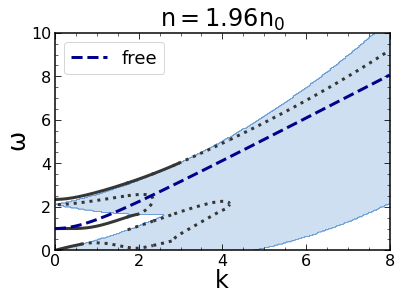

In [29]:
%matplotlib inline

label_done = False
for graph_file in graph_files:
    K, W = get_data_from_file(directory_name + graph_file)
    
    for w in W.T:
        solid_line_condition = np.abs(fv.d_pnn_corr_pnd_corr(K, w, pf, width=0).imag) == 0 # <--
        not_solid_line_condition = np.invert(solid_line_condition)
        
        if label_done:
            plt.plot(K[solid_line_condition], w[solid_line_condition], color='#363636')
        else:
            plt.plot(K[solid_line_condition], w[solid_line_condition], color='#363636')#, label=r'$\omega (k)$')
            label_done = True
        
        plt.plot(K[not_solid_line_condition], w[not_solid_line_condition], color='#363636', ls=':')

K, W = np.meshgrid(np.r_[1e-9:8:200j], np.r_[1e-9:10:200j])

plt.contourf(K, W, np.abs(fv.d_pnn_corr_pnd_corr(K, W, pf, width=0).imag) > 0, cmap=cmap_blue, alpha=0.2) # <--

plt.plot(np.r_[1e-9:8:200j], free_branch_vec(np.r_[1e-9:8:200j]), color='darkblue', ls='--', label='free')

plt.xlim(0, 8)
plt.ylim(0, 10)

plt.title(r'$n = %.2f n_0$' % n_pf)
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega$')
plt.legend()
plt.savefig('figures/_eq_pnn_corr_pnd_corr_%3.2f.jpg' % n_pf, dpi=300, format='JPG', bbox_inches='tight') # <--
plt.show()